**NAME - HAMZA**

In [ ]:
pip install wbgapi

In [ ]:
## importing libraries
import pandas as pd
import wbgapi as wb
# for visulization 
import matplotlib.pyplot as plt
import seaborn as sns
#for Modeling 
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# for mathametical operations 
from numpy import array, exp
from scipy.optimize import curve_fit
#for preprocessing 
from sklearn.preprocessing import StandardScaler

In [ ]:
# getting the  relevent data 
gd = ['NY.GDP.MKTP.PP.CD','SP.POP.TOTL']
ctr = ["AFG","PAK",'BMU','LUX','CHE','IND','CHL','BGD','AUS','CHN']
cl=['EN.ATM.CO2E.GF.KT','EG.ELC.ACCS.RU.ZS']
GDP  = wb.data.DataFrame(gd, ctr, mrv=6)
Climate = wb.data.DataFrame(cl, ctr, mrv=6)

#NY.GDP.MKTP.PP.CD- PPP GDP
#SP.POP.TOTL- Total population
#EN.ATM.CO2E.GF.KT- CO2 emissions from gaseous fuel consumption 
#EG.ELC.ACCS.RU.ZS- Electricity rural access

In [ ]:
Climate.head(7)

YR2015        YR2016      YR2017      YR2018  \
economy series                                                                  
AFG     EG.ELC.ACCS.RU.ZS     64.573357     97.099358   97.091972   95.586174   
        EN.ATM.CO2E.GF.KT    282.359000    319.029000         NaN         NaN   
AUS     EG.ELC.ACCS.RU.ZS    100.000000    100.000000  100.000000  100.000000   
        EN.ATM.CO2E.GF.KT  73809.376000  79122.859000         NaN         NaN   
BGD     EG.ELC.ACCS.RU.ZS     65.222130     66.143646   81.571030   89.083008   
        EN.ATM.CO2E.GF.KT  48782.101000  53593.205000         NaN         NaN   
BMU     EG.ELC.ACCS.RU.ZS    100.000000    100.000000  100.000000  100.000000   

                              YR2019      YR2020  
economy series                                    
AFG     EG.ELC.ACCS.RU.ZS   97.07563   97.066711  
        EN.ATM.CO2E.GF.KT        NaN         NaN  
AUS     EG.ELC.ACCS.RU.ZS  100.00000  100.000000  
        EN.ATM.CO2E.GF.KT        NaN         NaN  
BGD     EG.ELC.ACCS.RU.ZS   88.85360   95.211967  
        EN.ATM.CO2E.GF.KT        NaN         NaN  
BMU     EG.ELC.ACCS.RU.ZS  100.00000  100.000000

In [ ]:
# getting the parameters for the GDP 
GDP.columns = [t.replace('YR','') for t in GDP.columns]      
GDP=GDP.stack().unstack(level=1)                             
GDP.index.names = ['Country_Cde', 'Year']                           
GDP.columns                                                     
GDP.fillna(0)
GDP.head(10)

series            NY.GDP.MKTP.PP.CD  SP.POP.TOTL
Country_Cde Year                                
AFG         2015       7.183170e+10   34413603.0
            2016       7.009796e+10   35383028.0
            2017       7.471192e+10   36296111.0
            2018       7.741557e+10   37171922.0
            2019       8.187980e+10   38041757.0
            2020       8.091834e+10   38928341.0
AUS         2015       1.101457e+12   23815995.0
            2016       1.143149e+12   24190907.0
            2017       1.190694e+12   24601860.0
            2018       1.253361e+12   24982688.0

In [ ]:
# Parametyers for the climate 
Climate.columns = [t.replace('YR','') for t in Climate.columns]      
Climate=Climate.stack().unstack(level=1)                             
Climate.index.names = ['Country_Cde', 'Year']                           
Climate.columns                                                     
Climate.fillna(0)
Climate.head(5)

series            EG.ELC.ACCS.RU.ZS  EN.ATM.CO2E.GF.KT
Country_Cde Year                                      
AFG         2015          64.573357            282.359
            2016          97.099358            319.029
            2017          97.091972                NaN
            2018          95.586174                NaN
            2019          97.075630                NaN

In [ ]:
#Data cleaning 
x=GDP.reset_index()
y=Climate.reset_index()


In [ ]:
#Merging both the data for the analysis 
d = pd.merge(x,y)
d.head(10)

series,Country_Cde,Year,NY.GDP.MKTP.PP.CD,SP.POP.TOTL,EG.ELC.ACCS.RU.ZS,EN.ATM.CO2E.GF.KT
0,AFG,2015,7.183170e+10,34413603.0,64.573357,282.359
1,AFG,2016,7.009796e+10,35383028.0,97.099358,319.029
2,AFG,2017,7.471192e+10,36296111.0,97.091972,NaN
3,AFG,2018,7.741557e+10,37171922.0,95.586174,NaN
4,AFG,2019,8.187980e+10,38041757.0,97.075630,NaN
5,AFG,2020,8.091834e+10,38928341.0,97.066711,NaN
6,AUS,2015,1.101457e+12,23815995.0,100.000000,73809.376
7,AUS,2016,1.143149e+12,24190907.0,100.000000,79122.859
8,AUS,2017,1.190694e+12,24601860.0,100.000000,NaN
9,AUS,2018,1.253361e+12,24982688.0,100.000000,NaN


In [ ]:
d.value_counts()

Country_Cde  Year  NY.GDP.MKTP.PP.CD  SP.POP.TOTL   EG.ELC.ACCS.RU.ZS  EN.ATM.CO2E.GF.KT
AFG          2015  0.002766           2.434657e-02  0.225265           0.000700             1
             2016  0.002694           2.503368e-02  0.936567           0.000791             1
CHL          2017  0.018424           1.304629e-02  1.000000           0.000000             1
             2018  0.019644           1.322968e-02  1.000000           0.000000             1
             2019  0.019631           1.338764e-02  1.000000           0.000000             1
             2020  0.019578           1.350401e-02  1.000000           0.000000             1
CHN          2015  0.732832           9.779785e-01  1.000000           0.910338             1
             2016  0.770534           9.835992e-01  1.000000           1.000000             1
             2017  0.818929           9.895707e-01  1.000000           0.000000             1
             2018  0.895212           9.942097e-01  1.000000     

In [ ]:
d = d.fillna(0)

In [ ]:
#Normalizing the dataset

g = d.iloc[:,2:]
d.iloc[:,2:] = (g-g.min())/ (g.max() - g.min())
d.head(10)

series,Country_Cde,Year,NY.GDP.MKTP.PP.CD,SP.POP.TOTL,EG.ELC.ACCS.RU.ZS,EN.ATM.CO2E.GF.KT
0,AFG,2015,0.002766,0.024347,0.225265,0.000700
1,AFG,2016,0.002694,0.025034,0.936567,0.000791
2,AFG,2017,0.002884,0.025681,0.936405,0.000000
3,AFG,2018,0.002996,0.026302,0.903475,0.000000
4,AFG,2019,0.003179,0.026918,0.936048,0.000000
5,AFG,2020,0.003140,0.027547,0.935853,0.000000
6,AUS,2015,0.045174,0.016835,1.000000,0.183108
7,AUS,2016,0.046892,0.017101,1.000000,0.196290
8,AUS,2017,0.048850,0.017392,1.000000,0.000000
9,AUS,2018,0.051431,0.017662,1.000000,0.000000


In [ ]:
#K-means clustering
d_val = d.drop('Country_Cde', axis = 1)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(d_val)

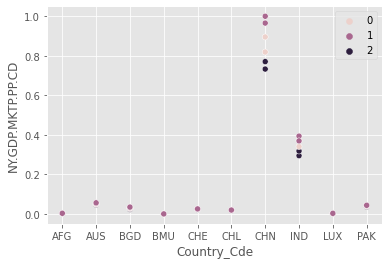

In [ ]:
#Clustering of countries as per PPP, GDP
# gettgting the pallte for ploting 
plt.style.use('ggplot')
sns.scatterplot(data=d, x="Country_Cde", y="NY.GDP.MKTP.PP.CD", hue=kmeans.labels_)
plt.show()

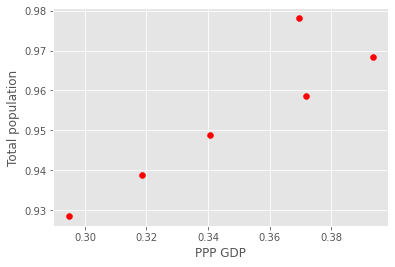

In [ ]:
#Scatter plot


final=d[(d['Country_Cde']=='IND')]
final1 = final.values
x, y = final1[:, 2], final1[:, 3]

plt.scatter(x, y,color="red")
plt.xlabel('PPP GDP')
plt.ylabel('Total population')
plt.show()

In [ ]:
# functions for bettter ploting and understanding 
import warnings
def func(x, a, b, c):
    return a*x**3+b*x+c
param, cov = curve_fit(func, x, y)

def plot_style(lable1,label2,xlabel1,ylabel):
  with warnings.catch_warnings(record=True):
    plt.plot(x, y, 'bo', label=lable1,color="blue")
    plt.plot(x, yfit, label=label2,color="black")
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 


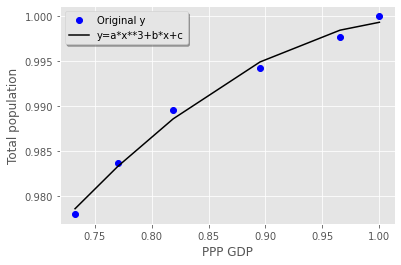

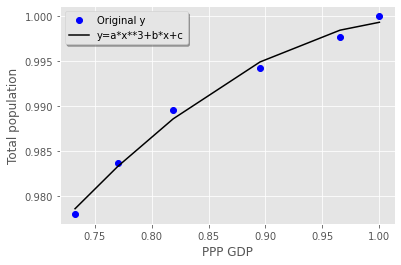

In [ ]:
#Using curve_fit for China- High GDP,ppp for the analysis 

final2=d[(d['Country_Cde']=='CHN')]
final3 = final2.values
x, y = final3[:, 2], final3[:, 3]
param, _ = curve_fit(func, x, y)
a, b, c = param[0], param[1], param[2]
yfit = a*x**3+b*x+c
plot_style("Original y","y=a*x**3+b*x+c",'PPP GDP','Total population')

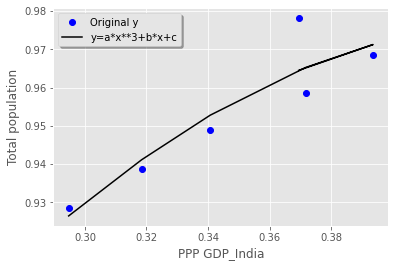

In [ ]:
#Using curve_fit for India- Mid GDP,ppp for the analysis 


x, y = final1[:, 2], final1[:, 3]




param, _ = curve_fit(func, x, y)
a, b, c = param[0], param[1], param[2]
yfit = a*x**3+b*x+c
#plot

plot_style("Original y","y=a*x**3+b*x+c",'PPP GDP_India','Total population')

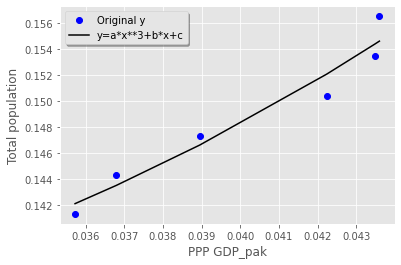

In [ ]:
# Analysis for the different country Using curve_fit for  pakistan  n- Low GDP,ppp


final4=d[(d['Country_Cde']=='PAK')]
final5 = final4.values
x, y = final5[:, 2], final5[:, 3]




param, _ = curve_fit(func, x, y)
a, b, c = param[0], param[1], param[2]
yfit = a*x**3+b*x+c

plot_style("Original y","y=a*x**3+b*x+c",'PPP GDP_pak','Total population') 

**Visualising one country from each cluster with a High, Medium and Low GDP,PPP it is evident that the total population has a direct relationship with the GDP,PPP**

In [ ]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 